In [2]:
import rasterio
from rasterio.warp import calculate_default_transform, reproject, Resampling

dst_crs = 'EPSG:4326'

with rasterio.open('./data/sib_cover_dec.tif') as src:
    transform, width, height = calculate_default_transform(
        src.crs, dst_crs, src.width, src.height, *src.bounds)
    kwargs = src.meta.copy()
    kwargs.update({
        'crs': dst_crs,
        'transform': transform,
        'width': width,
        'height': height
    })

    with rasterio.open('./data/sib_cover_dec.wgs84.tif', 'w', **kwargs) as dst:
        for i in range(1, src.count + 1):
            reproject(
                source=rasterio.band(src, i),
                destination=rasterio.band(dst, i),
                src_transform=src.transform,
                src_crs=src.crs,
                dst_transform=transform,
                dst_crs=dst_crs,
                resampling=Resampling.nearest)





RasterioIOError: ./data/sib_cover_dec.tif: No such file or directory

In [3]:
import folium
import rasterio
import geopandas as gpd
import numpy as np

import branca.colormap as cm
import matplotlib.pyplot as plt
from matplotlib import colors as colors

class_name = "/home/c7161037/Desktop/map_dashboard/data/sib_classes.wgs84.tif"
eve_name = "/home/c7161037/Desktop/map_dashboard/data/sib_cover_eve.wgs84.tif"
dec_name = "/home/c7161037/Desktop/map_dashboard/data/sib_cover_dec.wgs84.tif"
parks_name = "/home/c7161037/Desktop/map_dashboard/data/parks.geojson"

parks = gpd.read_file(parks_name)[["siteName", "geometry"]]
#parks["style"] =[{"fillColor": "#00000000", "color": "black"} for _ in range(len(parks))]
style = {"fillColor": "#00000000"}#, "color": ""}


with rasterio.open(class_name) as class_raster:
    class_array = class_raster.read(1)
    bounds = [x for x in class_raster.bounds]
    class_array[np.isnan(class_array)] = -999
    class_array = class_array.astype(int)

rasLon = (bounds[3] + bounds[1])/2
rasLat = (bounds[2] + bounds[0])/2
mapCenter = [rasLon, rasLat]

with rasterio.open(eve_name) as eve_raster:
    eve_array = eve_raster.read(1)
    eve_array[np.isnan(eve_array)] = -999
    eve_array = eve_array.astype(int)

with rasterio.open(dec_name) as dec_raster:
    dec_array = dec_raster.read(1)
    dec_array[np.isnan(dec_array)] = -999
    dec_array = dec_array.astype(int)



m = folium.Map(mapCenter, zoom_start=10)
tile = folium.TileLayer(
        tiles = 'https://server.arcgisonline.com/ArcGIS/rest/services/World_Imagery/MapServer/tile/{z}/{y}/{x}',
        attr = 'Esri',
        name = 'Esri Satellite',
        overlay = False,
        control = True
       ).add_to(m)





def mapvalue2color(value, cmap): 
    """
    Map a pixel value of image to a color in the rgba format. 
    As a special case, nans will be mapped totally transparent.
    
    Inputs
        -- value - pixel value of image, could be np.nan
        -- cmap - a linear colormap from branca.colormap.linear
    Output
        -- a color value in the rgba format (r, g, b, a)    
    """
    if value == -999:#np.isnan(value):
        return (1, 0, 0, 0)
    else:
        return colors.to_rgba(cmap(value), 0.7)  

vmin = np.floor(np.nanmin(class_array))
vmax = np.ceil(np.nanmax(class_array))

colormap = cm.linear.RdBu_11.scale(0, 6)

#folium.raster_layers.ImageOverlay(
#    image=class_array,
#    name = "forest type",
#    bounds=[[bounds[1], bounds[0]], [bounds[3], bounds[2]]],
#    opacity=1,
#    interactive=True,
#    cross_origin=False,
#    colormap= lambda value: mapvalue2color(value, colormap)
#    ).add_to(m)

colormap = cm.linear.Greens_03.scale(0, 1)

#folium.raster_layers.ImageOverlay(
#    image=eve_array,
#    name = "cover EVE",
#    bounds=[[bounds[1], bounds[0]], [bounds[3], bounds[2]]],
#    opacity=1,
#    interactive=True,
#    cross_origin=False,
#    colormap= lambda value: mapvalue2color(value, colormap)
#    ).add_to(m)
#
#folium.raster_layers.ImageOverlay(
#    image=dec_array,
#    name = "cover DEC,"
#    bounds=[[bounds[1], bounds[0]], [bounds[3], bounds[2]]],
#    opacity=1,
#    interactive=True,
#    cross_origin=False,
#    colormap= lambda value: mapvalue2color(value, colormap)
#    ).add_to(m)

folium.GeoJson(parks,
               name = "selected parks",
               style_function=lambda x: style
               ).add_to(m)

# Add layer control
folium.LayerControl().add_to(m)

m



In [26]:
from rio_tiler.colormap import cmap
cmap.list()

['accent',
 'accent_r',
 'afmhot',
 'afmhot_r',
 'algae',
 'algae_r',
 'amp',
 'amp_r',
 'autumn',
 'autumn_r',
 'balance',
 'balance_r',
 'binary',
 'binary_r',
 'blues',
 'blues_r',
 'bone',
 'bone_r',
 'brbg',
 'brbg_r',
 'brg',
 'brg_r',
 'bugn',
 'bugn_r',
 'bupu',
 'bupu_r',
 'bwr',
 'bwr_r',
 'cfastie',
 'cividis',
 'cividis_r',
 'cmrmap',
 'cmrmap_r',
 'cool',
 'coolwarm',
 'coolwarm_r',
 'cool_r',
 'copper',
 'copper_r',
 'cubehelix',
 'cubehelix_r',
 'curl',
 'curl_r',
 'dark2',
 'dark2_r',
 'deep',
 'deep_r',
 'delta',
 'delta_r',
 'dense',
 'dense_r',
 'diff',
 'diff_r',
 'flag',
 'flag_r',
 'gist_earth',
 'gist_earth_r',
 'gist_gray',
 'gist_gray_r',
 'gist_heat',
 'gist_heat_r',
 'gist_ncar',
 'gist_ncar_r',
 'gist_rainbow',
 'gist_rainbow_r',
 'gist_stern',
 'gist_stern_r',
 'gist_yarg',
 'gist_yarg_r',
 'gnbu',
 'gnbu_r',
 'gnuplot',
 'gnuplot2',
 'gnuplot2_r',
 'gnuplot_r',
 'gray',
 'gray_r',
 'greens',
 'greens_r',
 'greys',
 'greys_r',
 'haline',
 'haline_r',
 'hot'

In [6]:
import leafmap.foliumap as leafmap
#import leafmap
import geopandas as gpd



parks_name = "https://raw.githubusercontent.com/benehiebl/maps_traceve/main/data/parks.geojson"
vpo_name = "https://raw.githubusercontent.com/benehiebl/maps_traceve/main/data/vpo.geojson"
eve_name = "https://raw.githubusercontent.com/benehiebl/maps_traceve/main/data/gen_cover_eve.wgs84.COG.tif"
dec_name = "https://raw.githubusercontent.com/benehiebl/maps_traceve/main/data/gen_cover_dec.wgs84.COG.tif"
class_name = 'https://api.ellipsis-drive.com/v3/path/e6c55e3d-154f-4f61-b477-128a4af5fd81/raster/timestamp/e8234b7e-c85a-461a-a12a-99754b1a72ed/tile/{z}/{x}/{y}?style=d68b956d%2d541d%2d4256%2d8901%2d8ef163c7a33c&token=epat_Kkh0lVilBZMTZFwzvyBP5IkYqQBH3cZLjPU333j30KmJlBATsYdRI4gODBANy9rW'
sib_eve_name = "https://raw.githubusercontent.com/benehiebl/maps_traceve/main/data/sib_cover_eve.wgs84.COG.tif"
sib_dec_name = "https://raw.githubusercontent.com/benehiebl/maps_traceve/main/data/sib_cover_dec.wgs84.COG.tif"
sib_class_name = "https://api.ellipsis-drive.com/v3/path/2b46a0fb-bbb8-47fa-84b5-31b707e6ea50/raster/timestamp/e5831b26-33d5-4463-b5e0-f0408004d3b8/tile/{z}/{x}/{y}?style=8dd14ae9%2d5d1a%2d4efe%2dadeb%2db9792b175099&token=epat_uMqm47CrbhbMCKKt9wjGG2IZsPntPh7bHfAl9nxrP1kjpuFd9efOR1zSam6pbyRx"

colors = [(255, 113, 36), (1, 3, 131), (164, 227, 157), (114, 124, 216), (12, 201, 2), (12, 89, 1), (7, 37, 233)]
labels = ["azonal", "boreal", "mediterranean broad", "mediterranean needle", "submediterranean", "temperate broad", "temperate needle"]




# add filters
#with st.echo():

m2 = leafmap.Map(basemap="Esri.WorldImagery")#, height="1000px", width="1500px")
m2.add_basemap("Esri.WorldImagery")

m2.add_tile_layer(url=class_name,
                  name="Gennargentu forest type",
                  attribution="gen_classes")

m2.add_cog_layer(eve_name,
        vmin=0, vmax=100,
        colormap_name="greens",
        name="Gennargentu Cover EVE")

m2.add_cog_layer(dec_name,
        vmin=0, vmax=100,
        colormap_name="greens",
        name="Gennargentu Cover DEC")

m2.add_tile_layer(url=sib_class_name,
                  name="Sibillini forest type",
                  attribution="sib_classes")

m2.add_cog_layer(sib_eve_name,
        vmin=0, vmax=100,
        colormap_name="greens",
        name="Sibillini Cover EVE")

m2.add_cog_layer(sib_dec_name,
        vmin=0, vmax=100,
        colormap_name="greens",
        name="Sibillini Cover DEC")

parks = gpd.read_file(parks_name)[["siteName", "geometry"]]
style = {"fillColor": "#00000000"}
m2.add_gdf(parks, layer_name="Parks", style_callback=lambda x: style)

vpos = gpd.read_file(vpo_name)
#style = {"fillColor": "#00000000"}
m2.add_gdf(vpos, layer_name="VPOs")#, style_callback=lambda x: style)

#m2.add_circle_markers_from_xy(vpos, popup="img", max_width=550)
#m2.add_layer_manager()

m2.add_legend(title="Forest Type", labels=labels, colors=colors, draggable=True, position="topright")
m2.add_colormap(label="Cover %", cmap="Greens", vmin=0, vmax=100, position=(6,1), width=3, height=0.2, label_size=9, transparent=True)

try:
        m2.add_inspector_gui(position='topright', opened=True)
except: pass


m2.save("../map_sibgen.html")
m2

Map(center=[20, 0], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom_out_text…


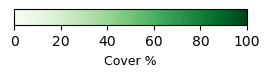

In [ ]:
import leafmap.foliumap as leafmap
import geopandas as gpd
from folium import IFrame
import folium
import base64


parks_name = "https://raw.githubusercontent.com/benehiebl/maps_traceve/main/data/parks.geojson"
vpo_name = "https://raw.githubusercontent.com/benehiebl/maps_traceve/main/data/vpo.geojson"
eve_name = "https://raw.githubusercontent.com/benehiebl/maps_traceve/main/data/gen_cover_eve.wgs84.COG.tif"
dec_name = "https://raw.githubusercontent.com/benehiebl/maps_traceve/main/data/gen_cover_dec.wgs84.COG.tif"
class_name = "https://raw.githubusercontent.com/benehiebl/maps_traceve/main/data/gen_classes.wgs84.COG.tif"
sib_eve_name = "https://raw.githubusercontent.com/benehiebl/maps_traceve/main/data/sib_cover_eve.wgs84.COG.tif"
sib_dec_name = "https://raw.githubusercontent.com/benehiebl/maps_traceve/main/data/sib_cover_dec.wgs84.COG.tif"
sib_class_name = "https://raw.githubusercontent.com/benehiebl/maps_traceve/main/data/sib_classes.wgs84.COG.tif"

colors = [(255, 113, 36), (1, 3, 131), (164, 227, 157), (114, 124, 216), (12, 201, 2), (12, 89, 1), (7, 37, 233)]
labels = ["azonal", "boreal", "mediterranean broad", "mediterranean needle", "submediterranean", "temperate broad", "temperate needle"]




# add filters
#with st.echo():

m2 = leafmap.Map(basemap="Esri.WorldImagery")#, height="1000px", width="1500px")
m2.add_basemap("Esri.WorldImagery")





m2.add_raster(class_name ,
        layer_name="Gennargentu forest type")

m2.add_raster(eve_name,
        vmin=0, vmax=100,
        cmap="Greens",
        layer_name="Gennargentu Cover EVE")

m2.add_raster(dec_name,
        vmin=0, vmax=100,
        cmap="Greens",
        layer_name="Gennargentu Cover DEC")

m2.add_raster(sib_class_name ,
        layer_name="Sibillini forest type")

m2.add_raster(sib_eve_name,
        vmin=0, vmax=100,
        cmap="Greens",
        layer_name="Sibillini Cover EVE")

m2.add_raster(sib_dec_name,
        vmin=0, vmax=100,
        cmap="Greens",
        layer_name="Sibillini Cover DEC")

parks = gpd.read_file(parks_name)[["siteName", "geometry"]]
style = {"fillColor": "#00000000"}
m2.add_gdf(parks, layer_name="Parks", style_callback=lambda x: style)

vpos = gpd.read_file(vpo_name)
#style = {"fillColor": "#00000000"}
m2.add_gdf(vpos, layer_name="VPOs")#, style_callback=lambda x: style)

#m2.add_circle_markers_from_xy(vpos, popup="img", max_width=550)

m2.add_legend(title="Forest Type", labels=labels, colors=colors, draggable=True, position="topright")
m2.add_colormap(label="Cover %", cmap="Greens", vmin=0, vmax=100, position=(6,1), width=3, height=0.2, label_size=9, transparent=True)

try:
        m2.add_inspector_gui(position='topright', opened=True)
except: pass


m2.to_html("../map_sibgen.html")
m2

In [24]:
from matplotlib.colors import ListedColormap

def read_colormap_file(file_path):
    colormap = []
    with open(file_path, 'r') as file:
        for line in file:
            values = line.strip().split(' ')
            # Extracting RGB(A) values
            rgb = list(map(int, values[1:5]))
            colormap.append(tuple(rgb))
    return colormap

# Path to your colormap file
colormap_file = '/home/c7161037/Desktop/map_dashboard/cm_classes.clr'

# Read the colormap
colors = read_colormap_file(colormap_file)
colors.append((0,0,0,0))
print(colors)


class_name = "/home/c7161037/Desktop/map_dashboard/data/gen_classes.wgs84.tif"
with rasterio.open(class_name) as class_raster:
    class_array = class_raster.read(1)
    bounds = [x for x in class_raster.bounds]
    #class_array += 1
    class_array[np.isnan(class_array)] = 7
    class_array = class_array.astype(int)
    crs = class_raster.crs
    profile = class_raster.profile
    print(np.unique(class_array))

#colors = ['#FF0000', '#00FF00', '#0000FF', '#FFFF00', '#FF00FF', '#00FFFF', '#000000', '#F00000']
cmap = ListedColormap(colors)
rgb_data = cmap(class_array)
print(rgb_data[:, :, 2].max())
profile.update(count=3, nodata=0, dtype=np.uint8)
print(profile)
# Extract RGB channels and scale to 0-255
#r = (rgb_data[:, :, 0] * 255).astype(np.uint8)
#g = (rgb_data[:, :, 1] * 255).astype(np.uint8)
#b = (rgb_data[:, :, 2] * 255).astype(np.uint8)
#a = (rgb_data[:, :, 3] * 255).astype(np.uint8)
r = rgb_data[:, :, 0].astype(np.uint8)
g = rgb_data[:, :, 1].astype(np.uint8)
b = rgb_data[:, :, 2].astype(np.uint8)
a = rgb_data[:, :, 3].astype(np.uint8)


# Stack the RGB channels
rgb_stack = np.stack((r, g, b, a), axis=-1)

raster_path = 'example_rgb_raster.tif'
with rasterio.open(raster_path, 'w', **profile) as dst:
    dst.write(rgb_stack[:, :, 0], 1)  # Red channel
    dst.write(rgb_stack[:, :, 1], 2)  # Green channel
    dst.write(rgb_stack[:, :, 2], 3)  # Blue channel



[(255, 113, 36, 255), (1, 3, 131, 255), (164, 227, 157, 255), (114, 124, 216, 255), (12, 201, 2, 255), (12, 89, 1, 255), (7, 37, 233, 255), (0, 0, 0, 0)]
[0 1 2 3 4 5 6 7]
233.0
{'driver': 'GTiff', 'dtype': <class 'numpy.uint8'>, 'nodata': 0, 'width': 6498, 'height': 6054, 'count': 3, 'crs': CRS.from_epsg(4326), 'transform': Affine(0.00011777650015389346, 0.0, 8.99976451,
       0.0, -8.970331020812602e-05, 40.344549642), 'blockysize': 1, 'tiled': False, 'interleave': 'band'}


In [124]:
rgb_stack[:,:,2].shape#.max()

(4455, 4307)

In [6]:
import rasterio
import numpy as np

eve_name = "/home/c7161037/Desktop/map_dashboard/data/gen_cover_dec.wgs84.tif"
with rasterio.open(eve_name) as class_raster:
    class_array = class_raster.read(1)
    class_array *= 100
    class_array[class_array>100] = 100
    class_array[class_array<0] = 0
    class_array[np.isnan(class_array)] = 101
    class_array = class_array.astype(int)
    profile = class_raster.profile
    
print(np.unique(class_array))

profile.update(dtype=np.uint8, nodata=101)
class_array = class_array.astype(np.uint8)


with rasterio.open("/home/c7161037/Desktop/map_dashboard/data/gen_cover_dec.wgs84.int.tif", "w", **profile) as dst:
    dst.write(class_array, 1)



[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101]


In [62]:
import xarray as xr

vpo = xr.load_dataset("/home/c7161037/traceve/01_data/sat_timeseries/s2_l2a/s2_l2a_ts_pts_vpo2023_cl_off_idx_v2.nc")
vpo

<xarray.Dataset>
Dimensions:                                  (time: 3144, band: 19, id: 576)
Coordinates: (12/66)
  * id                                       (id) <U7 '100_gen' ... '9_sib'
  * time                                     (time) datetime64[ns] 2015-07-04...
    x                                        (id) float64 2.28e+04 ... 3.567e+05
    y                                        (id) float64 4.456e+06 ... 4.771...
    s2:mgrs_tile                             (id) <U5 '32TNK' ... '33TUH'
    s2:product_type                          <U7 'S2MSI2A'
    ...                                       ...
    l6_cover_eve_needle_T3                   (id) float64 0.0 0.0 ... 0.0 0.0
    l6_cover_eve_needle_T12                  (id) int64 0 0 0 0 0 ... 0 0 0 0 0
    offset                                   (time) float64 0.0 0.0 ... -1e+03
    train_cluster                            (id) int32 6 7 6 7 6 ... 7 6 7 5 2
    sat:orbit_state                          <U10 'descending'
  * band                                     (band) <U6 'B02' 'B03' ... 'kNDVI2'
Data variables:
    ml_features                              (time, band, id) float64 378.0 ....

In [121]:

import geopandas as gpd

df = {"id": vpo.ml_features.coords["id"].values,
      "code": vpo.ml_features.coords["code"].values,
      "cell": vpo.ml_features.coords["cell"].values,
      "site": vpo.ml_features.coords["site"].values,
      "altitude": vpo.ml_features.coords["altitude"].values,
      "aspect": vpo.ml_features.coords["aspect"].values,
      "latitude": vpo.ml_features.coords["latitude"].values,
      "longitude": vpo.ml_features.coords["longitude"].values,
      "x_32633": vpo.ml_features.coords["x_32633"].values,
      "y_32633": vpo.ml_features.coords["y_32633"].values,
      "cover_eve_broad": vpo.ml_features.coords["cover_eve_broad"].values,
      "cover_dec_broad": vpo.ml_features.coords["cover_dec_broad"].values,
      "cover_eve_needle": vpo.ml_features.coords["cover_eve_needle"].values}
img_names = ['./imgs/plot_'+id+'.jpg' for id in df["id"].astype("U20")]
df["img_names"] = np.array(img_names)

for Filename in df["img_names"]:
      encoded = base64.b64encode(open(Filename, 'rb').read())
      html = '<img src="data:image/jpeg;base64,{}">'.format
imgs = ["<img src='https://raw.githubusercontent.com/benehiebl/maps_traceve/main/imgs/plot_"+id+".jpg' width=500>" for id in df["id"].astype("U20")]
#imgs = ['<img src="https://static.pexels.com/photos/189349/pexels-photo-189349.jpeg" height="150px" width="150px">' for id in df["id"].astype("U20")]
df["img"] = np.array(imgs)

gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df["x_32633"], df["y_32633"]), crs="EPSG:32633")
gdf = gdf.to_crs("EPSG:4326")

gdf["longitude"] = gdf.geometry.x
gdf["latitude"] = gdf.geometry.y

gdf.to_file("/home/c7161037/Desktop/map_dashboard/data/vpo.geojson", driver="GeoJSON")




In [122]:
gdf[:10].img[0]

'<img src="https://static.pexels.com/photos/189349/pexels-photo-189349.jpeg" height="150px" width="150px">'

In [16]:
tile1 = xr.load_dataset("/home/c7161037/Downloads/preds_genclasses_10_0_login.nc")
tile2 = xr.load_dataset("/home/c7161037/Downloads/preds_genclasses_12_11_login.nc")


In [17]:
merge = xr.merge([tile1, tile2])
merge

<xarray.Dataset>
Dimensions:              (x: 6500, y: 6000)
Coordinates:
  * x                    (x) float64 5e+05 5e+05 5e+05 ... 5.65e+05 5.65e+05
  * y                    (y) float64 4.406e+06 4.406e+06 ... 4.466e+06 4.466e+06
Data variables:
    Band1                (y, x) float64 nan nan nan nan nan ... nan nan nan nan
    transverse_mercator  |S1 b''
Attributes:
    Conventions:  CF-1.5
    GDAL:         GDAL 3.6.4, released 2023/04/17
    history:      Fri Jul 05 01:13:44 2024: GDAL Create( ./inference/preds/pr...

In [18]:
merge.to_netcdf("/home/c7161037/Downloads/preds_genclasses_05v5.nc")

In [40]:
import matplotlib.pyplot as plt
import seaborn
import scienceplots

vpo = vpo_raw.ml_features.sel(time=slice("2021-10-30", "2024-03-30"), band=["B04", "B08"])
vpo


<xarray.DataArray 'ml_features' (time: 834, band: 2, id: 576)>
array([[[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       ...,

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]]])
Coordinates: (12/66)
  * id                                       (id) <U7 '100_gen' ... '9_sib'
  * time                                     (time) datetime64[ns] 2021-10-30...
    x                                        (id) float64 2.28e+04 ... 3.567e+05
    y                                        (id) float64 4.456e+06 ... 4.771...
    s2:mgrs_tile                             (id) <U5 '32TNK' ... '33TUH'
    s2:product_type                          <U7 'S2MSI2A'
    ...                                       ...
    l6_cover_eve_needle_T3                   (id) float64 0.0 0.0 ... 0.0 0.0
    l6_cover_eve_needle_T12                  (id) int64 0 0 0 0 0 ... 0 0 0 0 0
    offset                                   (time) float64 0.0 0.0 ... -1e+03
    train_cluster                            (id) int32 6 7 6 7 6 ... 7 6 7 5 2
    sat:orbit_state                          <U10 'descending'
  * band                                     (band) <U6 'B04' 'B08'

In [41]:
from datetime import datetime, timedelta

from outlier import xr_outlier
from smooth import xr_smooth

vpo = vpo.groupby("time.dayofyear").mean()
year = "2023"
def day_to_datetime(year, day):
    return datetime(year, 1, 1) + timedelta(days=day - 1)
days = [int(day) for day in vpo.coords["dayofyear"].values]
dates = np.array([day_to_datetime(int(year) , day) for day in days])
vpo = vpo.assign_coords({"dayofyear": ("dayofyear", dates)})

xr_outlier(vpo, detection_mode="iqr", kwargs={"factor": 0.5, "window": 140}, inplace=True)
vpo_smooth = xr_smooth(vpo, interpolate_nan=True, smooth_mode="whittaker_smooth", kwargs={"lmbd": 120, "d": 1}, inplace=False)

#dataset = vpo.interpolate_na(dim="dayofyear", method=self.config.interpolate_na, fill_value="extrapolate")
ndvi = (vpo.sel(band="B08") - vpo.sel(band="B04")) / (vpo.sel(band="B08") + vpo.sel(band="B04"))
ndvi_smooth = (vpo_smooth.sel(band="B08") - vpo_smooth.sel(band="B04")) / (vpo_smooth.sel(band="B08") + vpo_smooth.sel(band="B04"))





In [ ]:
plt.style.use(["science"])
from matplotlib.gridspec import GridSpec
import seaborn as sns

for i, id in enumerate(ndvi.coords["id"].values):
    fig = plt.figure(layout="constrained", figsize=(5,3.5))
    gs = GridSpec(1, 1,  wspace=0.1, hspace=0.01, figure=fig)

    ax = fig.add_subplot(gs[0,0])
    sns.lineplot(x=ndvi_smooth.coords["dayofyear"].values, y=ndvi_smooth.sel(id=id).values, ax=ax, label="smoothed", color="darkorange")
    sns.scatterplot(x=ndvi.coords["dayofyear"].values, y=ndvi.sel(id=id).values, ax=ax, label="raw")
    handles, labels = ax.get_legend_handles_labels()
    ax.legend(handles=handles, labels=labels, loc="lower right")
    ax.set_ylabel("NDVI")
    ax.set_ylim(0,1)
    eve = ndvi.sel(id=id).coords["cover_eve_broad"].values
    dec = ndvi.sel(id=id).coords["cover_dec_broad"].values
    ax.set_title(f"Plot: {id} Cover EVE {int(eve)} DEC {int(dec)}")
    fig.savefig(f"imgs/plot_{id}.jpg", dpi=200)